In [1]:
import numpy as np, pandas as pd, seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [3]:
# load data
gold_data = pd.read_csv(r"F:\Gold price prediction ML\gld_price_data.csv")
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [5]:
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [6]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [7]:
gold_data[['SPX','GLD','USO', 'SLV','EUR/USD']]

,SPX,GLD,USO,SLV,EUR/USD
0,1447.160034,84.860001,78.470001,15.1800,1.471692
1,1447.160034,85.570000,78.370003,15.2850,1.474491
2,1411.630005,85.129997,77.309998,15.1670,1.475492
3,1416.180054,84.769997,75.500000,15.0530,1.468299
4,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...
2285,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,2730.129883,124.489998,14.380000,15.5600,1.193118


In [8]:
correlation = gold_data[['SPX','GLD','USO', 'SLV','EUR/USD']].corr()

<Axes: >

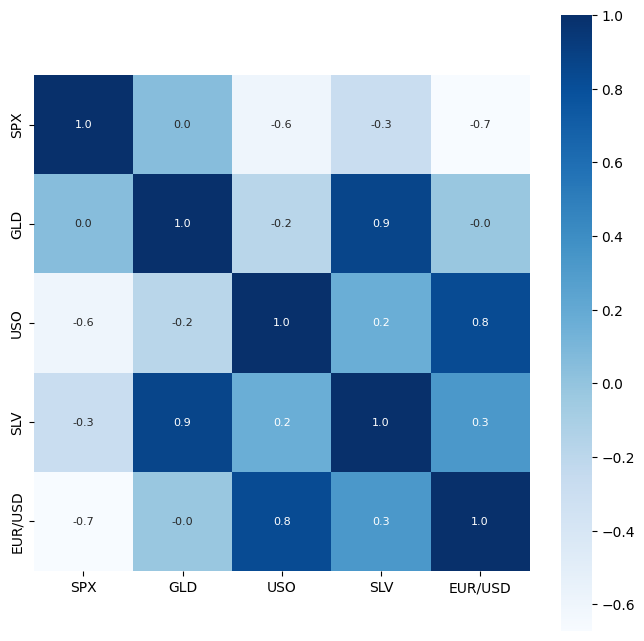

In [9]:
plt.figure(figsize= (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [10]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


C:\Users\T PLUG\AppData\Local\Temp\ipykernel_14832\1232657234.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'], color='green')


<Axes: xlabel='GLD', ylabel='Density'>

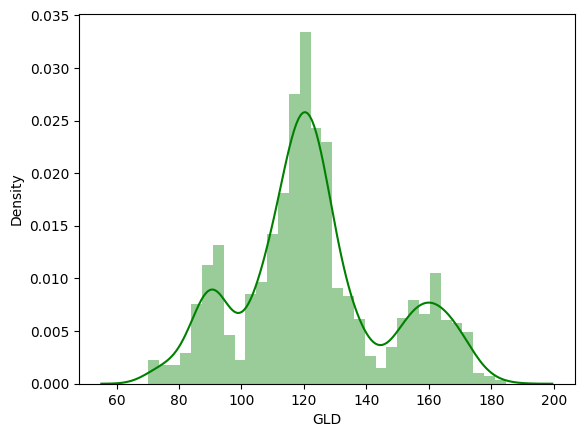

In [11]:
sns.distplot(gold_data['GLD'], color='green')

Splitting the features and target

In [12]:
X = gold_data.drop(['Date', 'GLD'], axis=1)
Y = gold_data['GLD']

print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


Split into training and test data

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

Model training : random forest

In [22]:
regressor = RandomForestRegressor(n_estimators=100, random_state=42)
regressor.fit(X_train, Y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [23]:
test_data_prediction = regressor.predict(X_test)
test_data_prediction

array([122.46679941, 130.28880316, 127.70419932,  96.69889736,
       118.97240056, 114.50079901, 124.67450149, 117.84389959,
       108.10790103,  98.21069968,  95.61129937, 167.99879857,
       149.34040124, 116.13570008, 170.55530159,  84.96309989,
       123.23299888, 109.29119695, 113.14450051, 131.563303  ,
       124.27449887, 113.57320034, 115.97140016, 108.77999947,
       108.75810135, 125.68899929, 120.15309974, 112.16129943,
       113.37350151, 125.49139916, 146.0725016 ,  89.49199989,
       167.60339936, 113.6085993 , 108.53440132, 120.03740137,
       141.96739869, 161.38440156, 173.95969773, 152.9370014 ,
       119.38640093, 113.20980076, 121.44059937, 113.70969947,
       121.9691377 , 108.14450089,  89.00129887, 114.45169953,
       129.91440194, 118.05950108, 104.45459997, 129.91970221,
       107.13079886, 160.90640329, 131.64309968, 118.5029995 ,
       146.78180036, 135.33990244,  95.55730104, 124.40920156,
       114.86129883,  86.201401  , 104.31749892, 113.93

In [24]:
error_score = metrics.r2_score(Y_test, test_data_prediction)
print('R squared error : ', error_score)

R squared error :  0.9900245384549384


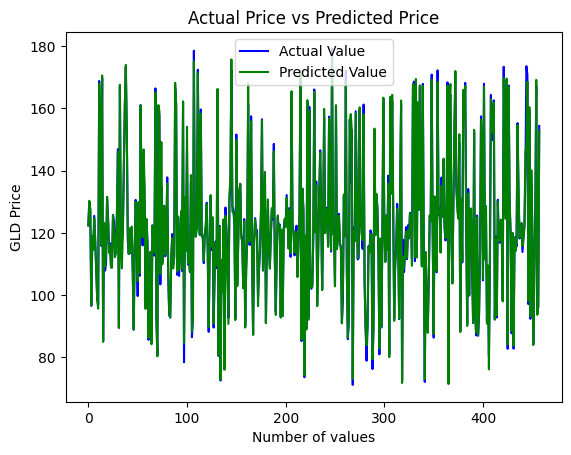

In [25]:
Y_test = list(Y_test)

plt.plot(Y_test, color='blue', label='Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

In [26]:
# save the model
import joblib
joblib.dump(regressor, 'RF_regression_model.pkl')


['RF_regression_model.pkl']

In [28]:
import joblib
import pandas as pd

# Load the trained logistic regression model
regressor = joblib.load(r"RF_regression_model.pkl")

# Get the expected feature names from the model
if hasattr(regressor, "feature_names_in_"):
    expected_features = regressor.feature_names_in_
else:
    raise ValueError("The model does not have 'feature_names_in_' attribute. Cannot build proper input.")

# Your input values
input_dict = {
    'SPX': float(input("Enter SPX value(Range 500-3000): ")), # Example: 
    'USO': float(input("Enter USO value(Range 5-150): ")), # Example:
    'SLV': float(input("Enter SLV value(Range 5-60): ")), # Example:
    'EUR/USD': float(input("Enter EUR/USD value(Range 1.0-2.0): "))  # Example:
}

# Fill missing features with 0 to match model's expected input
full_input_dict = {feature: input_dict.get(feature, 0) for feature in expected_features}

# Create a DataFrame with the correct column order
input_df = pd.DataFrame([full_input_dict])

# Make prediction
prediction = regressor.predict(input_df)

# Output the result
print("Gold Price Prediction: $", round(prediction[0], 2))


Gold Price Prediction: $ 81.5


In [29]:
pip install plotly

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.9 MB ? eta -:--:--
   -- ------------------------------------- 0.5/9.9 MB 1.2 MB/s eta 0:00:08
   ---- ----------------------------------- 1.0/9.9 MB 1.4 MB/s eta 0:00:07
   ----- ---------------------------------- 1.3/9.9 MB 1.4 MB/s eta 0:00:07
   ------ --------------------------------- 1.6/9.9 MB 1.5 MB/s eta 0:00:06
   ------- -------------------------------- 1.8/9.9 MB 1.4 MB/s eta 0:00:06
   --------- ------------------------------ 2.4/9.9 MB 1.5 MB/s eta 0:00:06
   ---------- ----------------------------- 2.6/9.9 MB 1.5 MB/s eta 0:00:05
   ----------- ---------------------------- 2.9/9.9 MB 1.5 MB/s eta 0:00:05
   ------------ --------------------------- 3.1/9.9 MB 1.4 MB/s eta 0:00:05
   ------------- --------------


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: C:\Users\T PLUG\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip
